<a href="https://colab.research.google.com/github/W3ndy42/FoodHub/blob/main/Project_FoodHub_Data_Analysis_WG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
%matplotlib inline

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations


In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/DS_Projecs/FoodHub/foodhub_order.csv').copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Observations:

- The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
- After analyzing the dataset, we can conclude that there are five numerical and four categorical columns.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Looking into the shape of the data set.
df.shape

(1898, 9)

#### Observations:
- The Dataset has 1898 number of rows with 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
#Printing a summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- All the columns have no null values.
- There are four columns with object datatype and five values, one float, and four integers.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Checking if there is not any missing value in the data.
df.isnull().sum().sum()

0

#### Observations:
- The dataset does not contain any null values, meaning there are no missing values in any of the columns.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Using describe method to check the statistical summary of the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
- Food preparation time: The minimum preparation time is 20.00 min and a maximum of 35.00 min, with an average of 27.37 min.

- Cost of the order: On average the cost of the orders is 16.50 dollars. The median costs are 14.14. There is not a huge difference between the maximum value and the 75% of the data which indicates there are no outliers in this column.

- Delivery Time: The delivery time has a median of 24.16 minutes and a maximum of 33 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:

df[(df['rating']=='Not given')].count()[0]

736

#### Observations:
- According to the data, there is a total of 736 orders not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

##**Observations on Order_id**

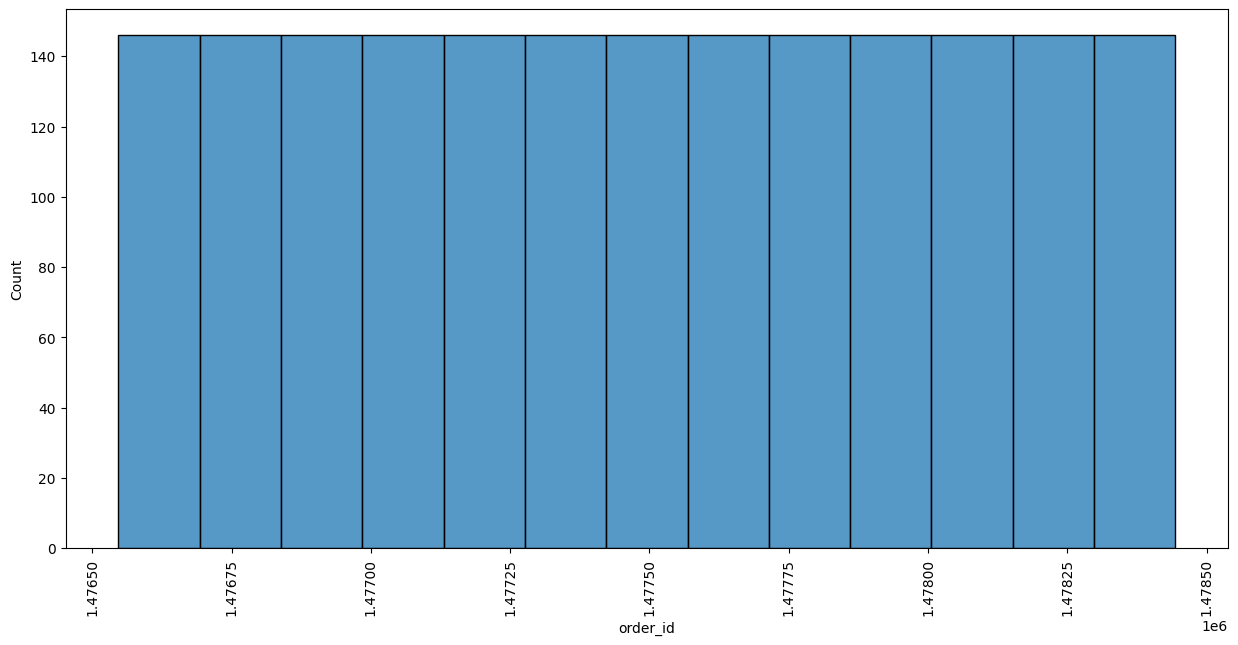

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x=df['order_id']);
plt.xticks(rotation=90);
plt.show()



- Order ID is an **identifier** variable.

##**Observations on Customer ID**

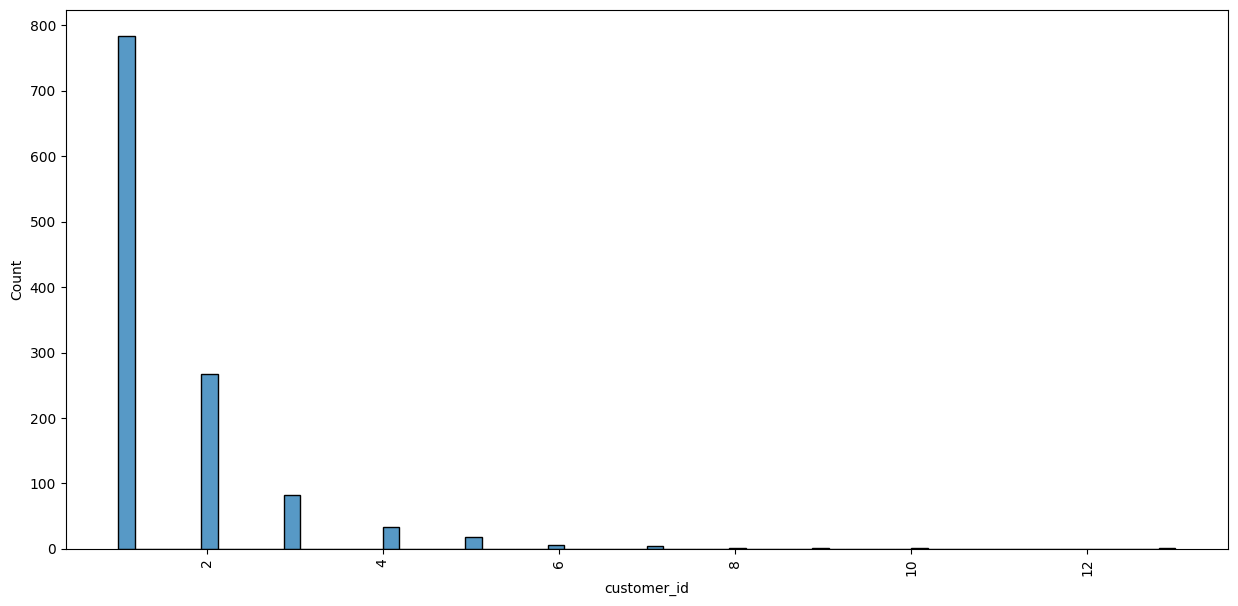

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x=df['customer_id'].value_counts());
plt.xticks(rotation=90);
plt.show()

In [ ]:
#checking how many recurrent customers are in the dataset
do=df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).reset_index()
d_recurrent_customer = do[do['order_id']>=2]
d_recurrent_customer

,customer_id,order_id
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7
...,...,...
411,41168,2
412,41638,2
413,343554,2
414,76907,2



- Out of 1200 customers in our app, 416 customers have placed an order more than one time.
- Customer id is an identifier variable.

##**Observations on Restaurant Name**

In [ ]:
#Printing the name of unique restaurants.
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

- According to the data seems to be some mistyping on some names, let's correct them.

In [ ]:
'''After exploring the dataset, we have observed mistakes in some restaurant names.
To address this issue that could cause errors later, we will use the replaced method.'''

df['restaurant_name'] = df['restaurant_name'].replace(['''Joe's Shanghai \x8e_À\x8eü£¾÷´'''], '''Joe's Shanghai''')
df['restaurant_name'] = df['restaurant_name'].replace(['Big Wong Restaurant \x8c_¤¾Ñ¼'], 'Big Wong Restaurant')
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant',
       'Empanada Mama (closed)', 'Pylos', "Lucky's Famous Burgers",
       'Shake Shack', 'Sushi of Gari', 'RedFarm Hudson',
       'Blue Ribbon Sushi', 'Five Guys Burgers and Fries', 'Tortaria',
       'Cafe Mogador', 'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu Ne

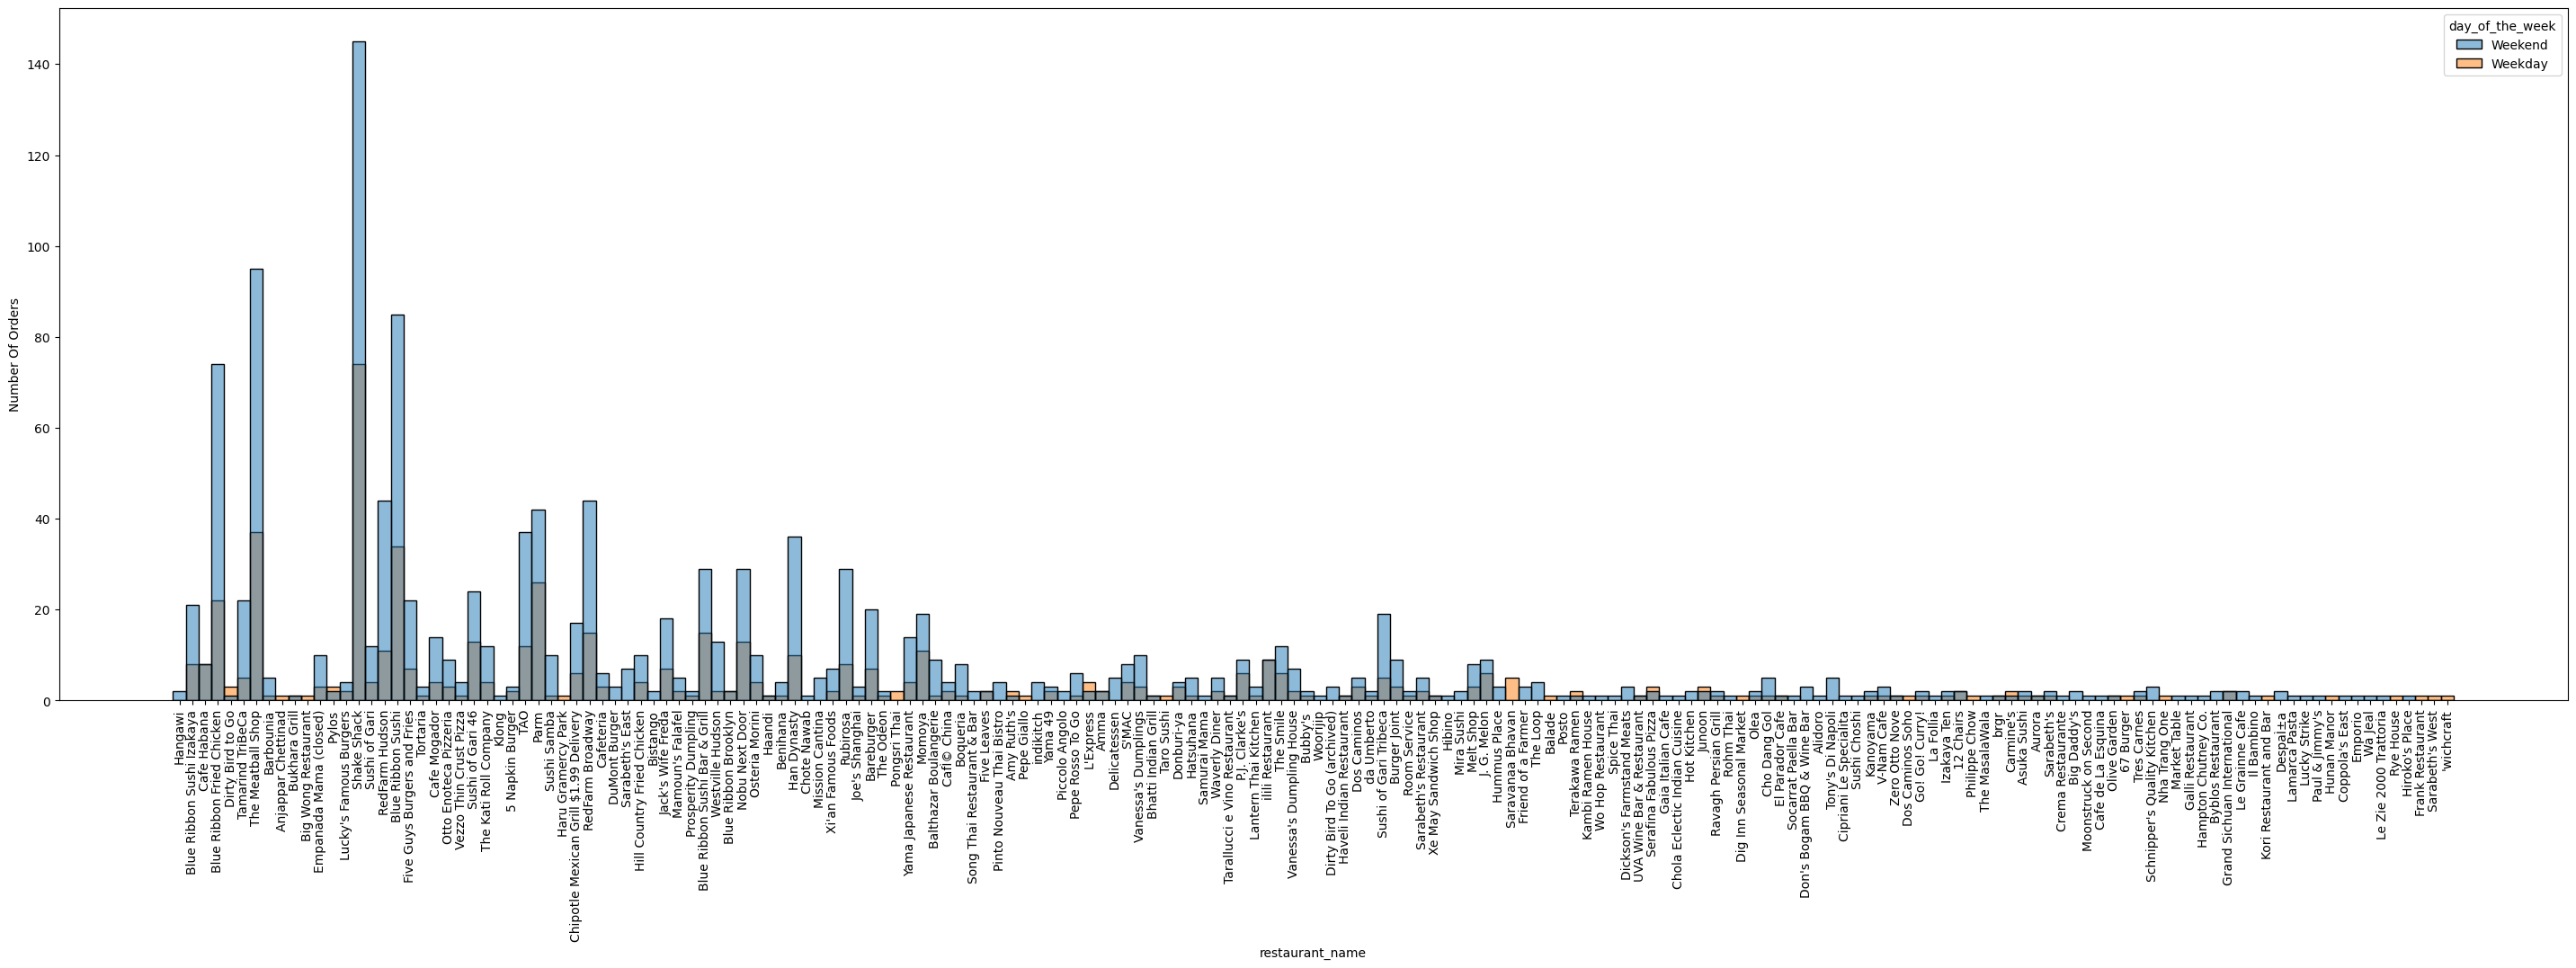

In [ ]:
plt.figure(figsize=(36,10))
sns.histplot(data=df, x="restaurant_name", hue='day_of_the_week');
plt.ylabel('Number Of Orders')
plt.xticks(rotation=90);
plt.show()

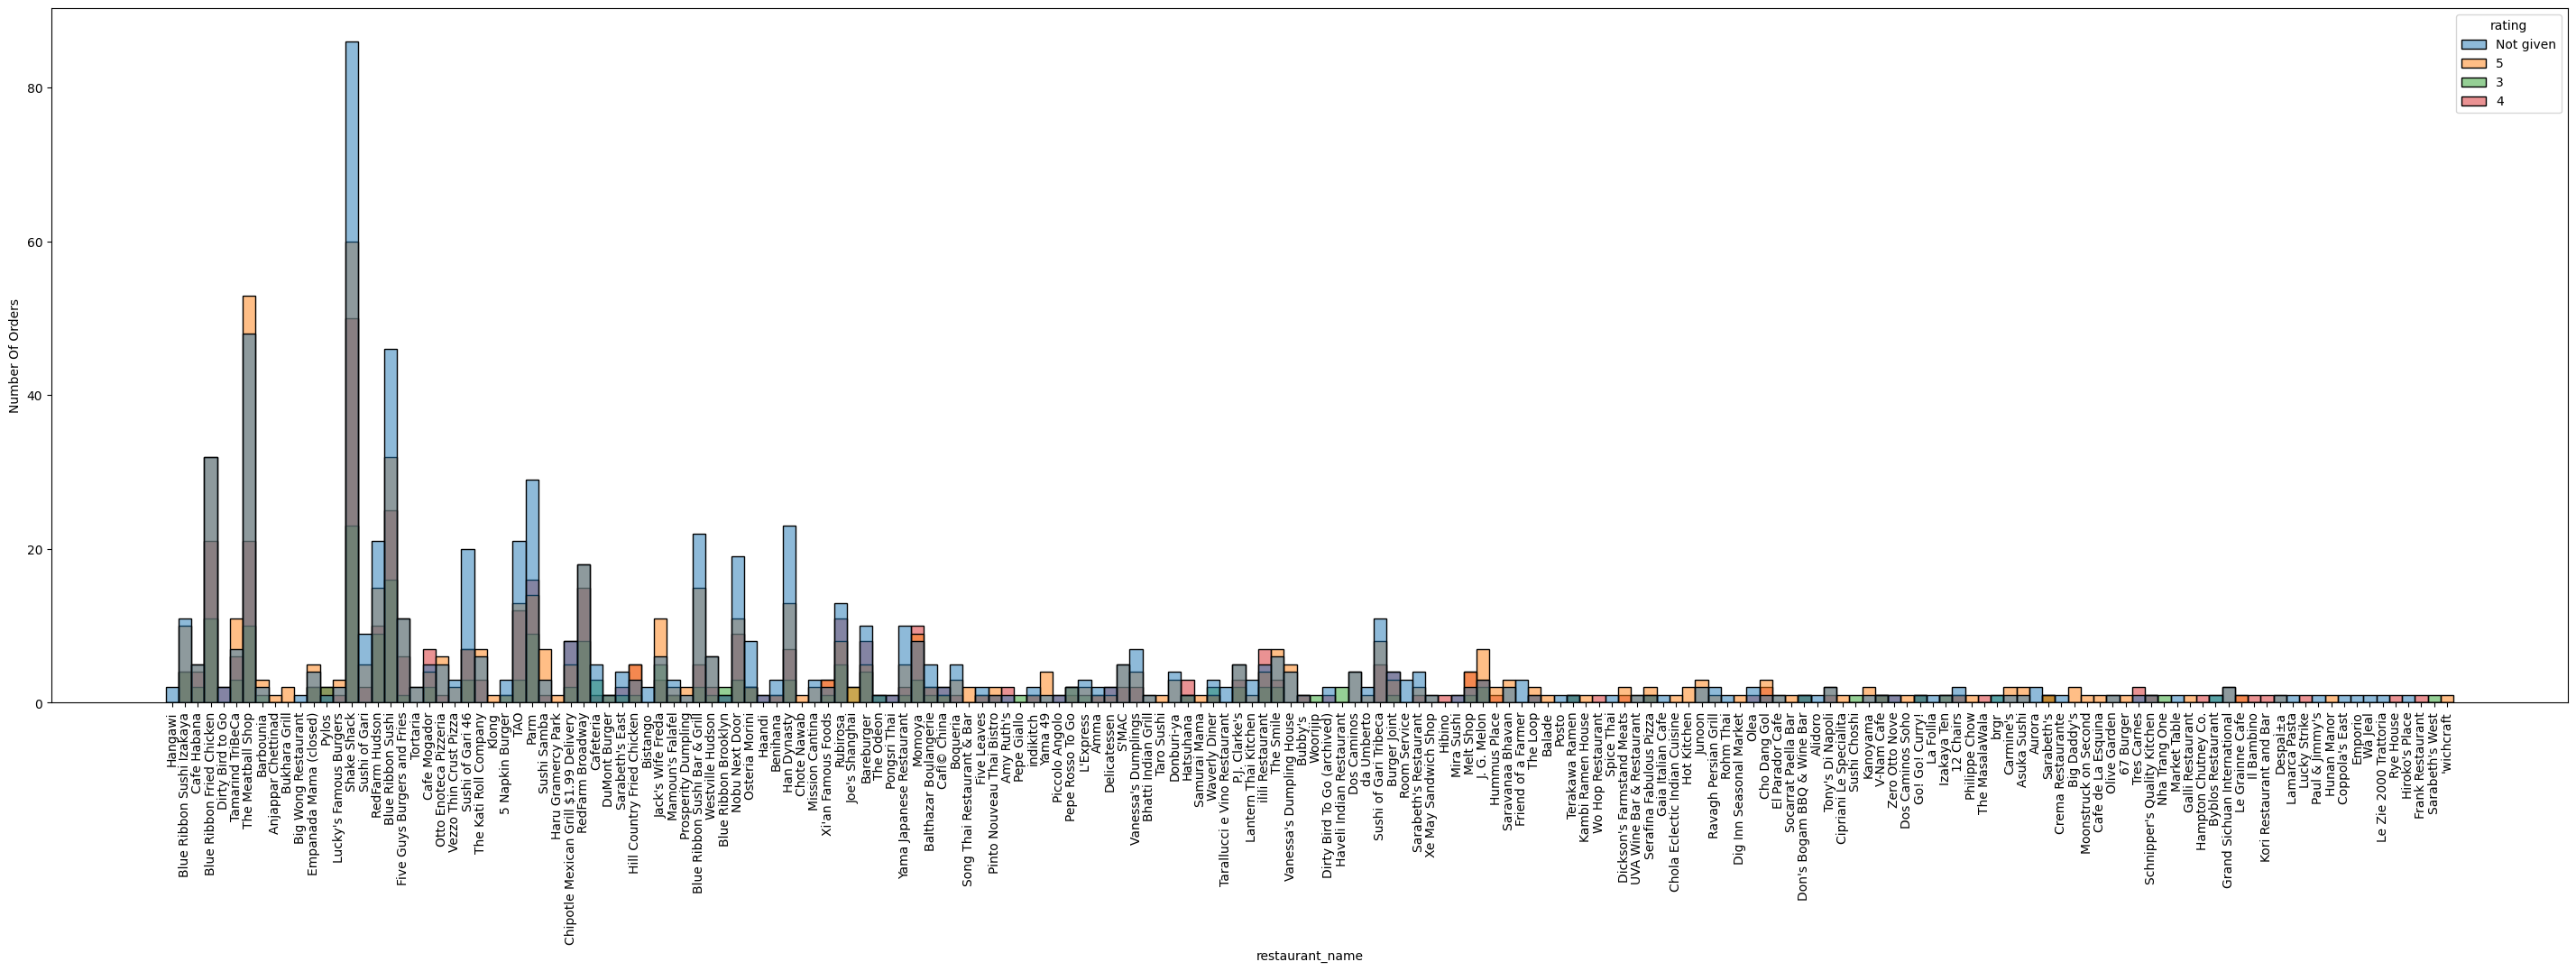

In [ ]:
plt.figure(figsize=(36,10))
sns.histplot(data=df, x="restaurant_name", hue='rating');
plt.ylabel('Number Of Orders')
plt.xticks(rotation=90);
plt.show()



- Shake Shack is a restaurant that receives a large number of orders compared to others on the data.
- There is a large number of restaurants with orders of less than 40 orders.
- We observed that several restaurants have no reviews in the dataset.

## **Observations on Cusine type**

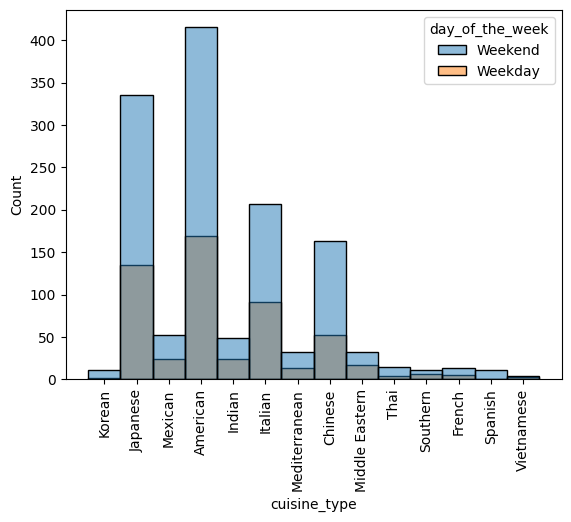

In [ ]:
sns.histplot(data=df, x="cuisine_type", hue='day_of_the_week');
plt.xticks(rotation=90)
plt.show()


- The most popular types of cuisine among customers are American, followed by Japanese cuisine and Italian.
- Vietnamese cuisine is the least popular.


##**Observations on Day of the week**

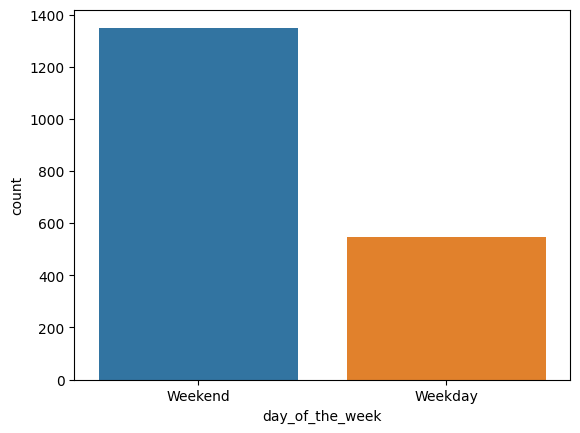

In [ ]:
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week');
plt.show()

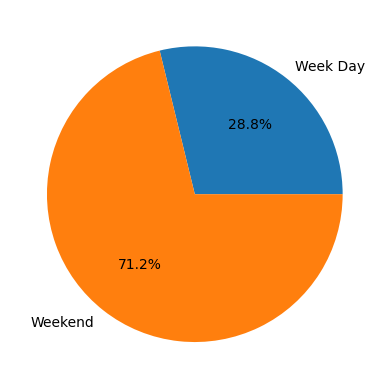

In [ ]:
lab =['Week Day','Weekend']
grouped = df.groupby('day_of_the_week');
plt.pie(data=grouped, labels=lab, x=grouped.day_of_the_week.count(), autopct="%1.1f%%");
plt.show()



- On weekends, 71.2% of orders are placed compared to 28.8% on weekdays according to data.

##**Observations on Cost of the order**

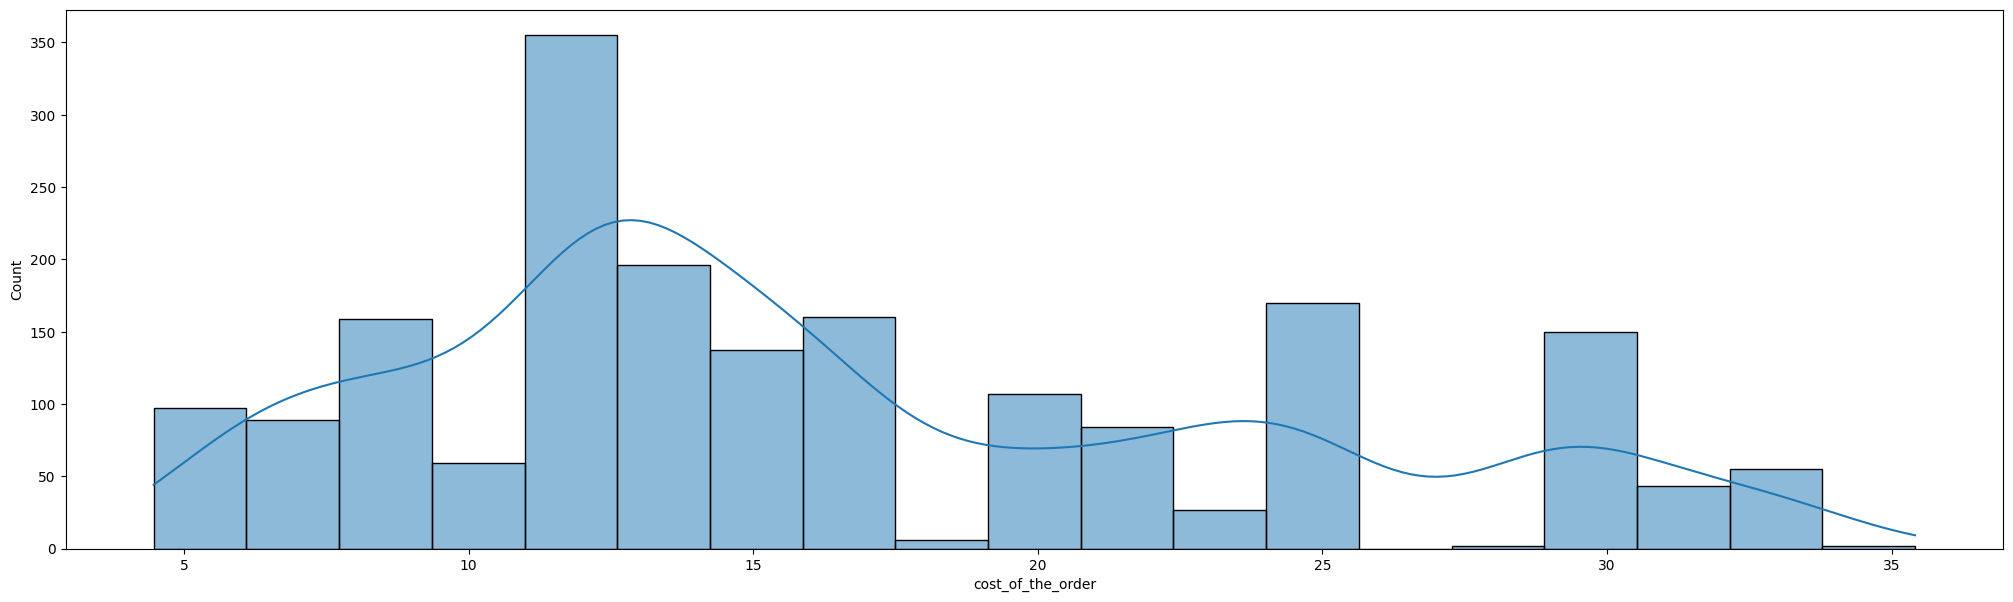

In [ ]:
plt.figure(figsize=(25,7))
sns.histplot(data=df, x="cost_of_the_order", kde=True);
plt.show()

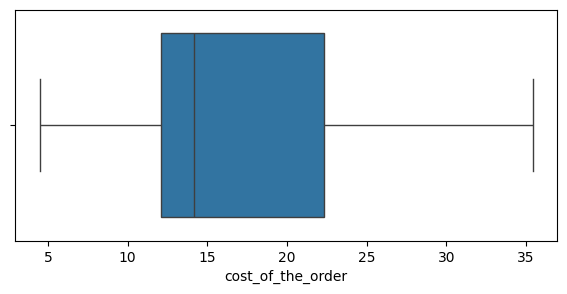

In [ ]:
plt.figure(figsize=(7,3))
sns.boxplot(data=df, x='cost_of_the_order');
plt.show()

- The median cost of the order is around 14 dollars.
- The distribution looks evenly distributed with no skewness.

##**Observations on Food preparation time**

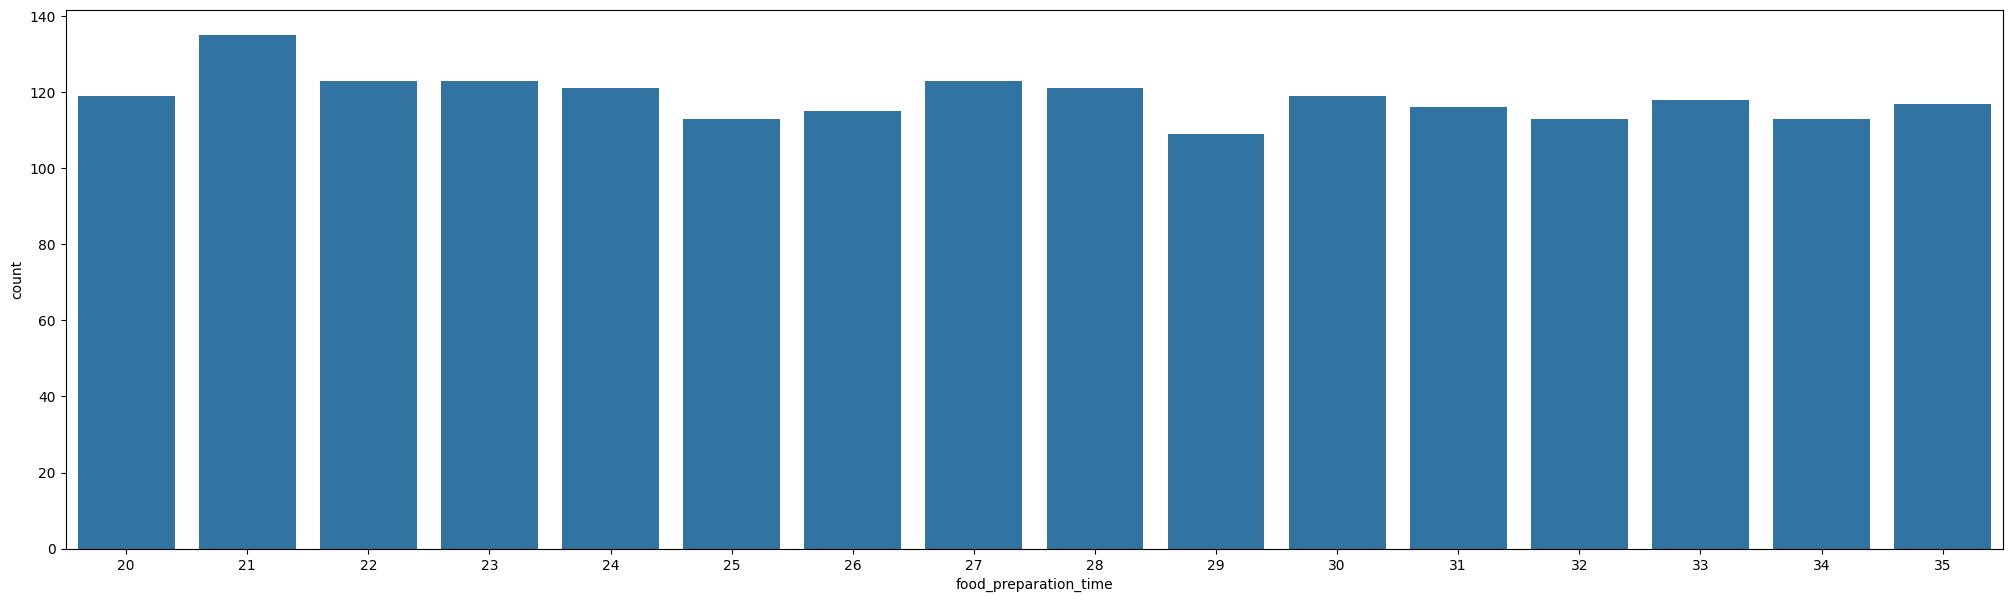

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(data=df, x='food_preparation_time');
plt.show()

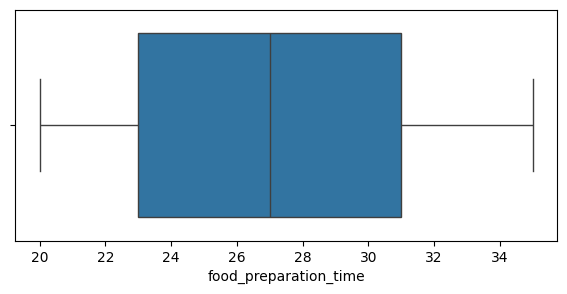

In [ ]:
plt.figure(figsize=(7,3))
sns.boxplot(data=df, x='food_preparation_time');
plt.show()


- The median food preparation time is approximately 28 minutes, with most dishes taking between 20 and 35 minutes to prepare.
- Most of the dishes are prepared between 23 and 31 minutes.

##**Observations on Delivery time**

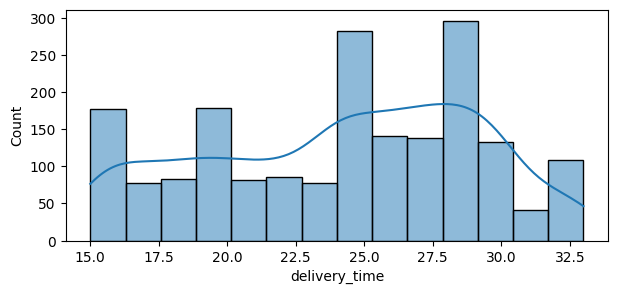

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(data=df, x='delivery_time', kde=True);
plt.show()

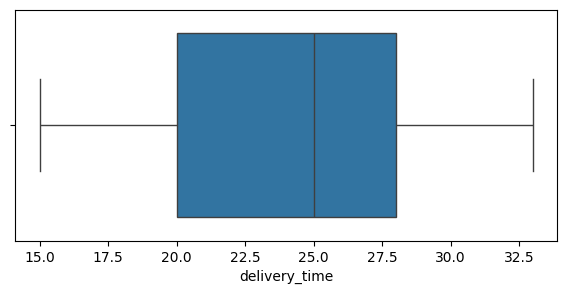

In [ ]:
plt.figure(figsize=(7,3))
sns.boxplot(data=df, x='delivery_time');
plt.show()


- Food delivery time ranges from 15 to 32.5 minutes with a median of 25 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get the top 5 restaurants with by number of orders.
df['restaurant_name'].value_counts().sort_values(ascending=False).head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Calculating the most popular cusine on weekends
df.groupby("cuisine_type", sort=True)["day_of_the_week"].apply(lambda ser: ser.str.contains("Weekend").sum()).head(1)


cuisine_type
American    415
Name: day_of_the_week, dtype: int64

#### Observations:
- Based on the data, American cuisine is the most popular type of cuisine during the weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Calculating the percentage of orders major of 20 dollars.
percentage = df[df['cost_of_the_order']>20].count()*100/df['cost_of_the_order'].count()
percentage[0]

29.24130663856691

#### Observations:
- The percentage of orders that cost more than 20 dollars is 29.24%.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Get the mean of delivery time.
df['delivery_time'].mean()

24.161749209694417

#### Observations:
- The mean of the delivery time variable is 24.16.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
- The top 3 most frequent customers are:
1. Customer ID 52832 with a total of 13 orders.
2. Customer ID 47440 with a total of 10 orders.
3. Customer ID 83287 with a total of  9 orders.



### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


##**Let's examine the relationship between numerical variables by checking their correlation.**

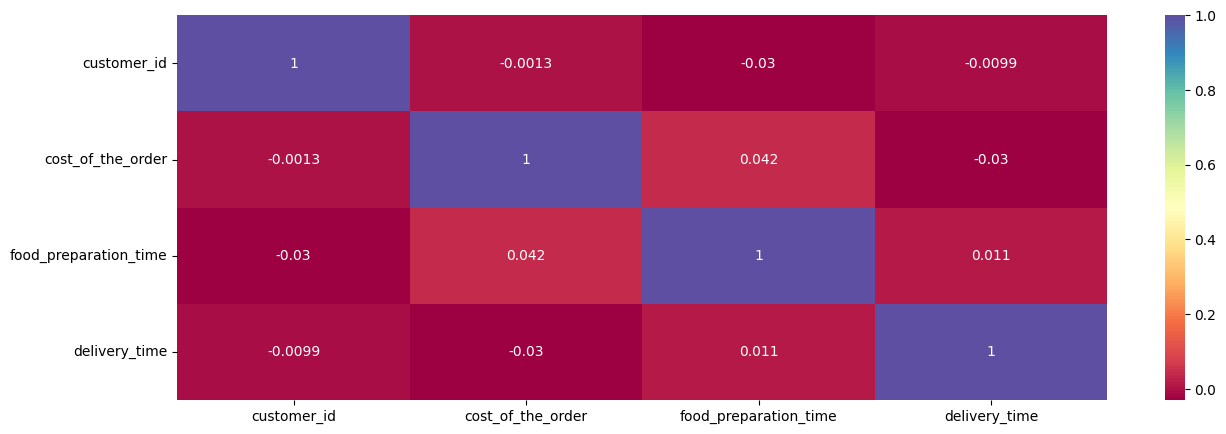

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(data=df[['customer_id','cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, cmap='Spectral');
plt.show()

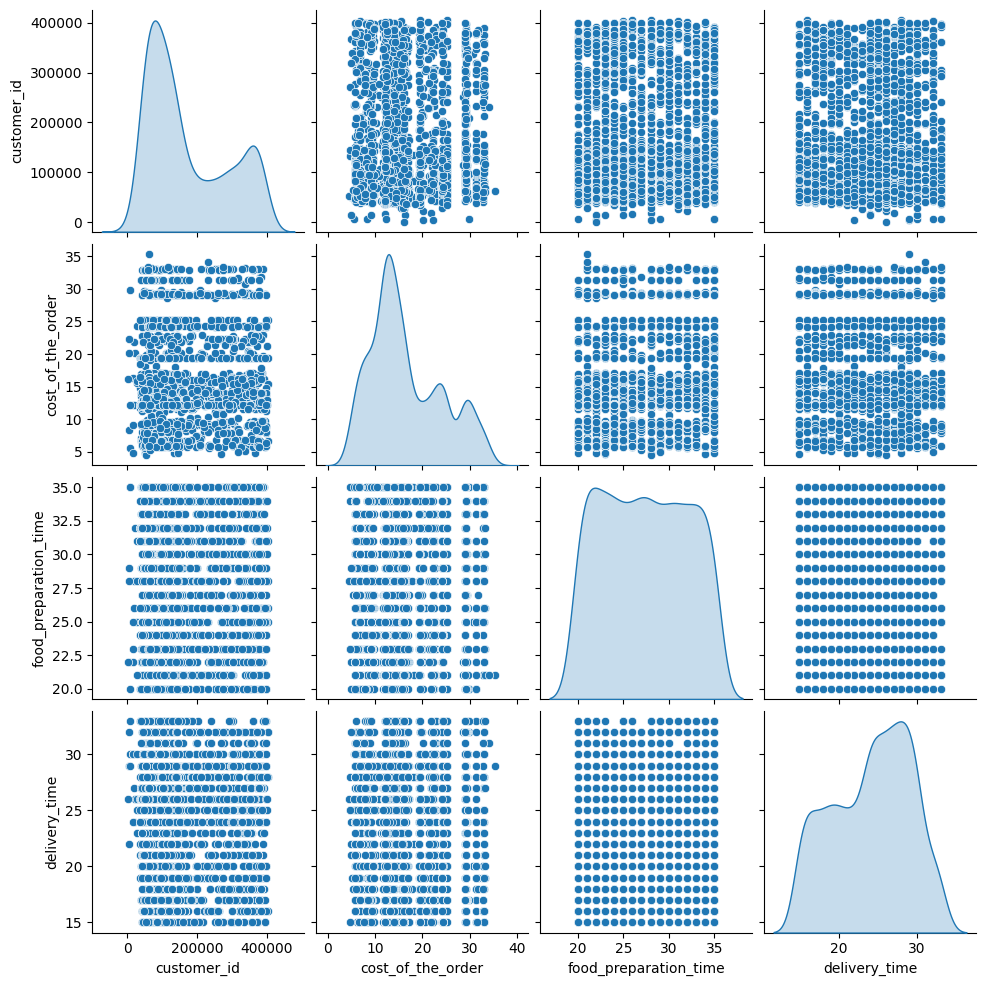

In [ ]:
sns.pairplot(df[['customer_id', 'cost_of_the_order','food_preparation_time','delivery_time']], diag_kind="kde");
plt.show()

#### Observations:
- We get the same insights as from the correlation plot
- There is no significant correlation among the numerical variables in the dataset, as indicated by the plots above.

###How many orders has been rating according to the data.

In [ ]:
df['rating'] = df['rating'].replace(['Not given'], '0')
df['rating'] = df['rating'].astype(int)

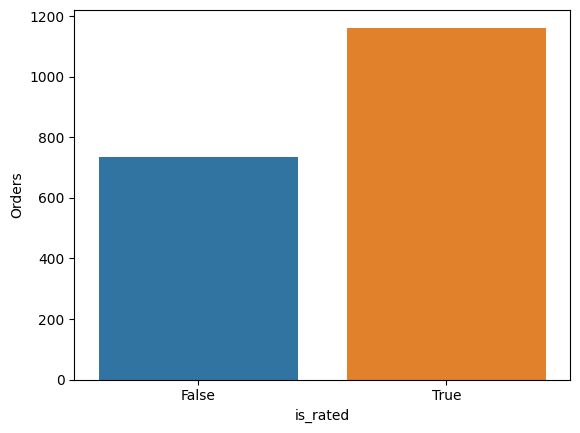

In [ ]:
df.loc[df['rating'] > 0,'is_rated'] = 'True'
df.loc[df['rating'] == 0, 'is_rated'] = 'False'
sns.countplot(data=df, x='is_rated', palette='tab10', hue='is_rated');
plt.ylabel('Orders');
plt.show()


*   Just 1162 orders out of 1898 have been rated by customers which is just the 61.22%.


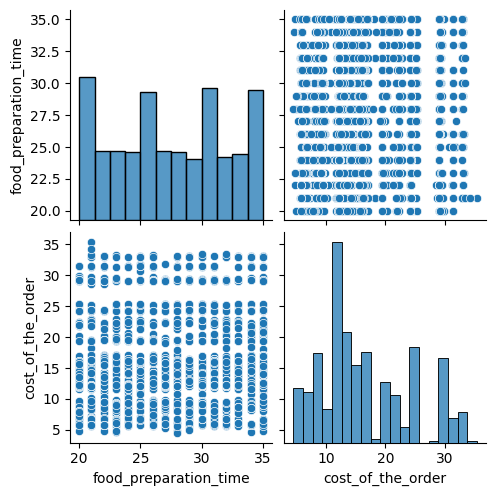

In [ ]:
sns.pairplot(data = df[['food_preparation_time','cost_of_the_order']]);
plt.show()

* The plot displays no significant correlation between the time taken for food preparation and the cost of the order.

###Understanding the relationship between rating and cost_of_the_order using suitable plots


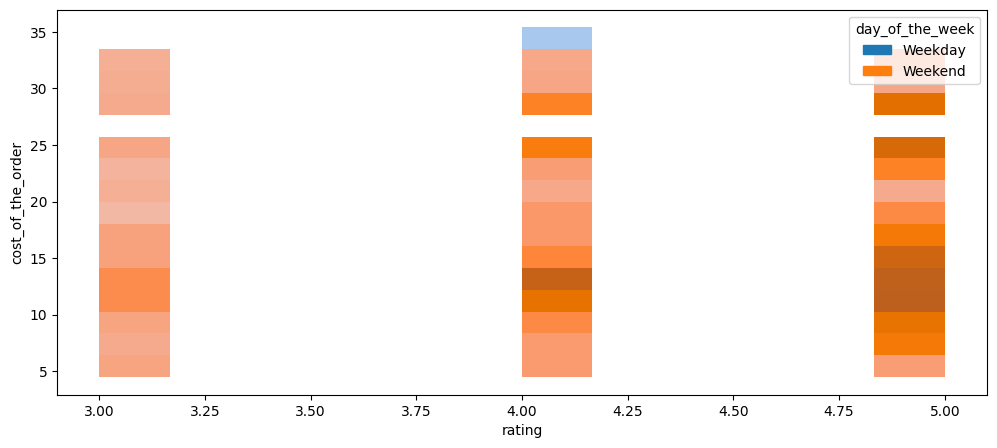

In [ ]:
#Geting all orders that has been rating..
df_not_giving_out = df[df['rating'] > 0]


plt.figure(figsize=(12,5))
sns.histplot(data=df_not_giving_out, y='cost_of_the_order', x='rating', hue='day_of_the_week', legend=True);
plt.show()

###Observations:

- Most of the ratings has been giving during the weekends.
- The most common rating values are 3, 4 and 5.

###Let's check the average of food preparation time by restaurant.

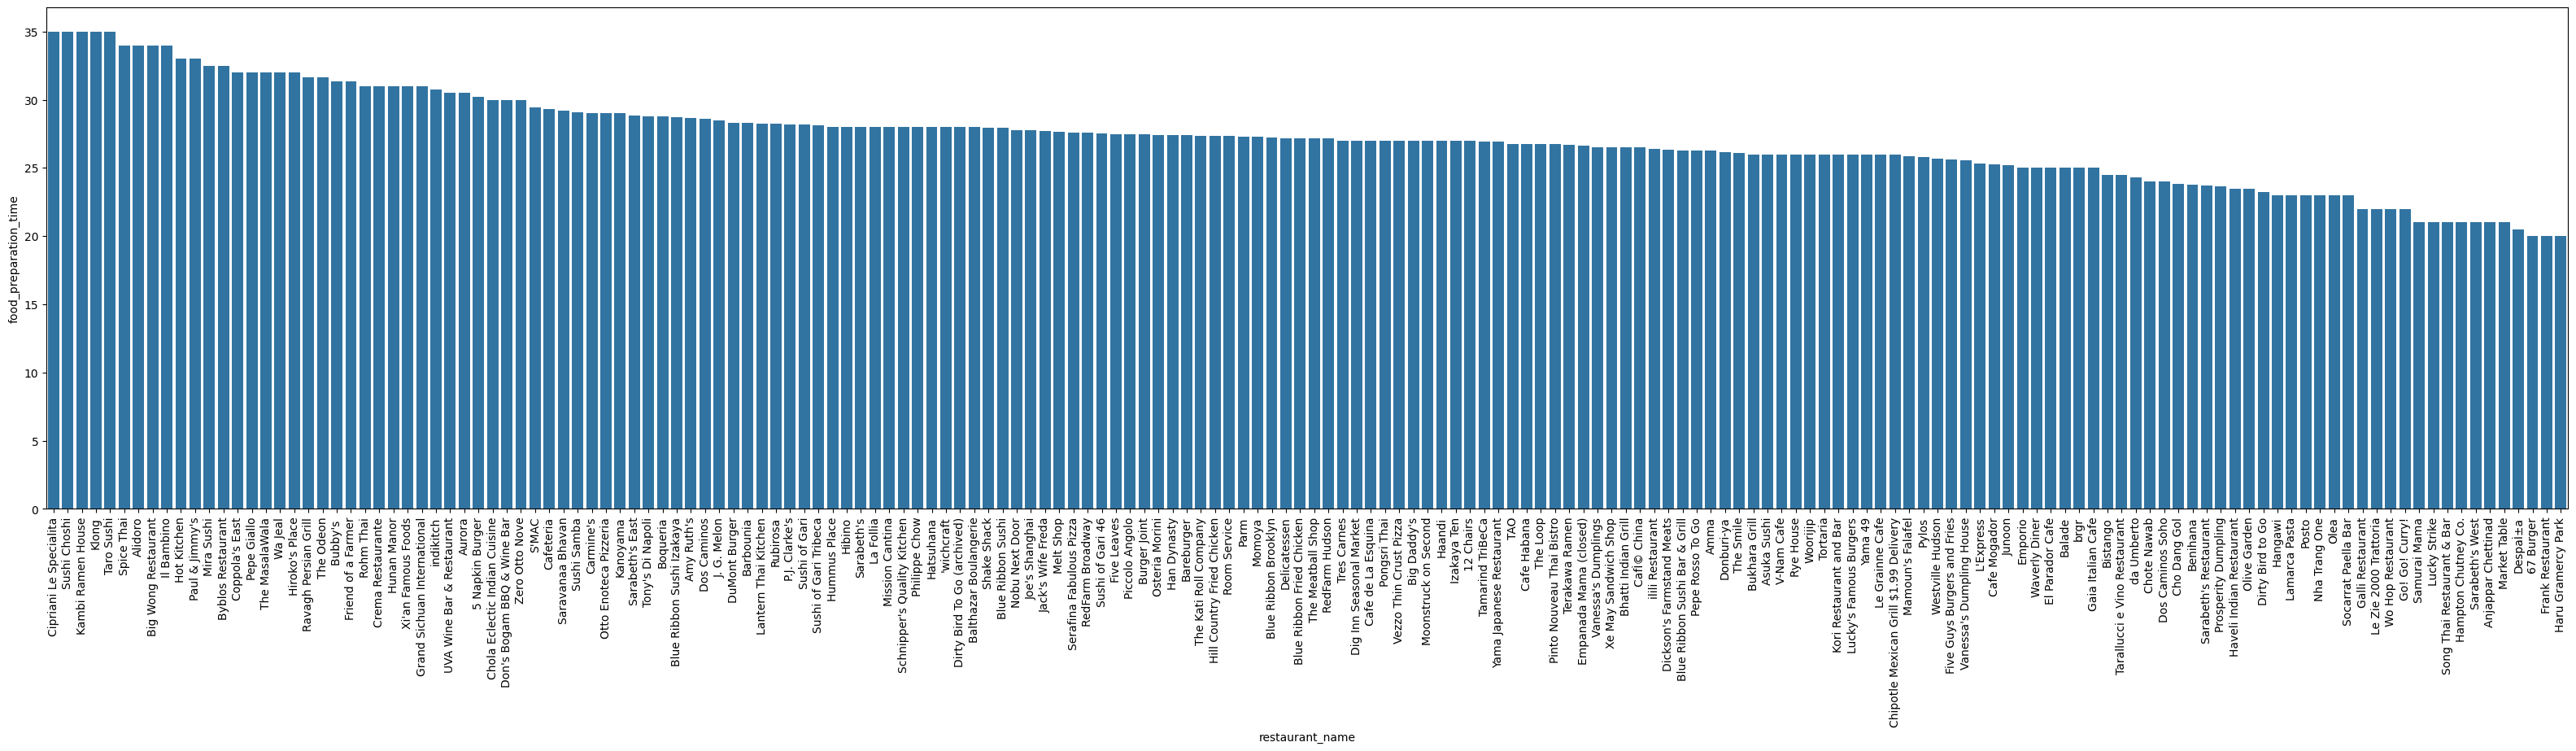

In [ ]:
#Calculating the mean of food preparation time by restaurant.
grouped_t = df.groupby('restaurant_name').mean(numeric_only=True)[['food_preparation_time']].sort_values('food_preparation_time', ascending=False).reset_index();

plt.figure(figsize=(40,8))
sns.barplot(data=grouped_t, x='restaurant_name', y='food_preparation_time')
plt.xticks(rotation=90);
plt.show()

###Let's check the average of rating time by restaurant.

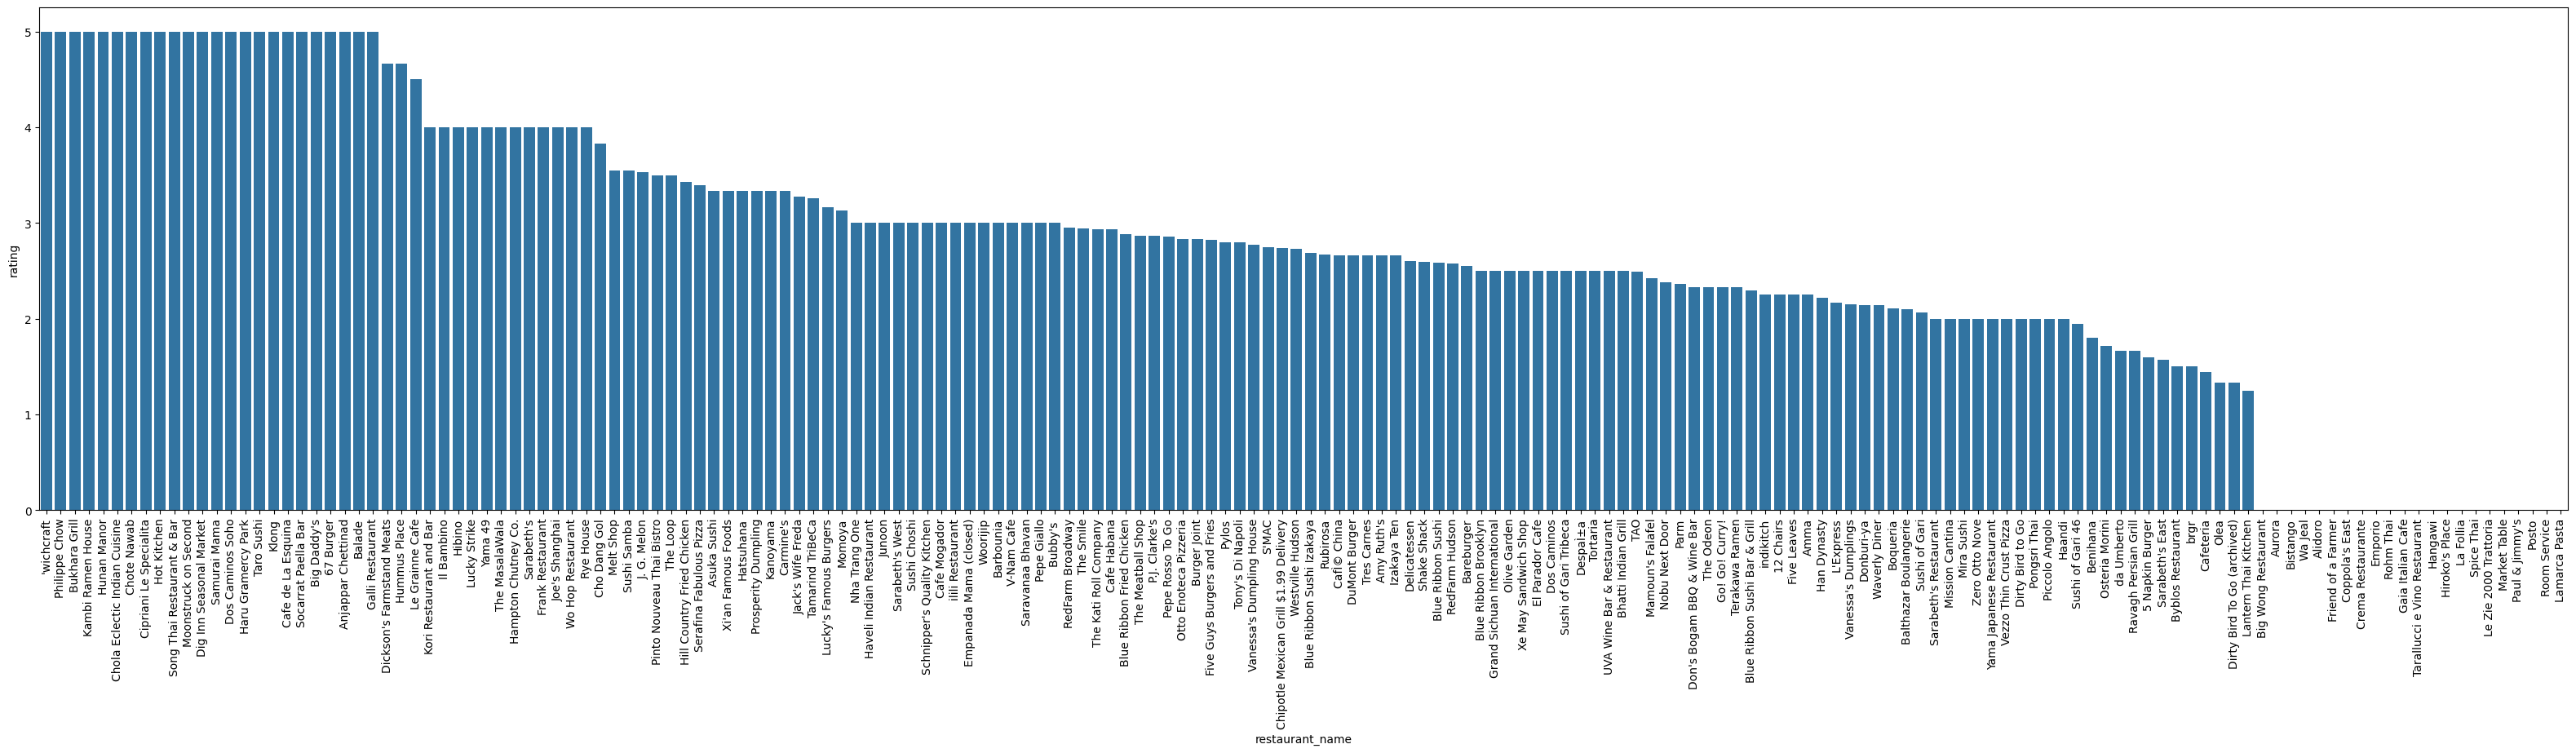

In [ ]:
#Calculating the mean of rating by restaurant.
grouped_r = df.groupby('restaurant_name').mean(numeric_only=True)[['rating']].sort_values('rating', ascending=False).reset_index();

plt.figure(figsize=(40,8));
plt.xticks(rotation=90);
sns.barplot(data=grouped_r, x='restaurant_name', y='rating');
plt.show()


###Let's check the rating by day of the week.

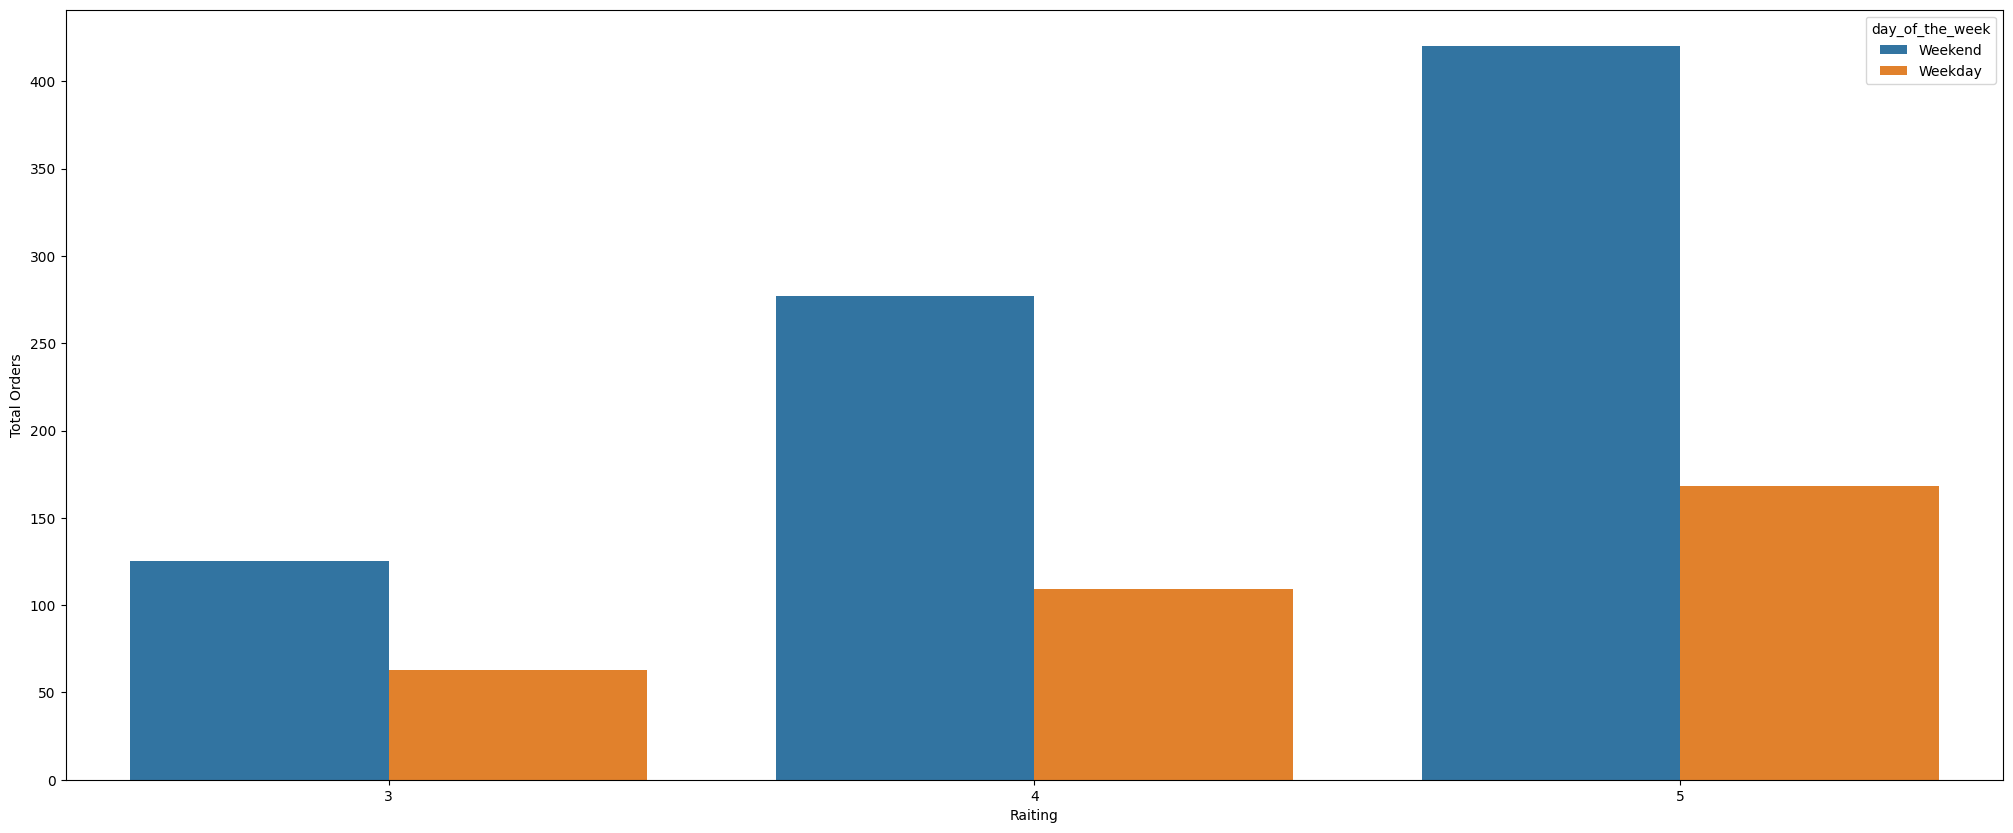

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(data=df_not_giving_out, x='rating', hue='day_of_the_week');
plt.ylabel('Total Orders')
plt.xlabel('Raiting')
plt.show()

###Observations:

- Most orders have been reviewed during the weekend.

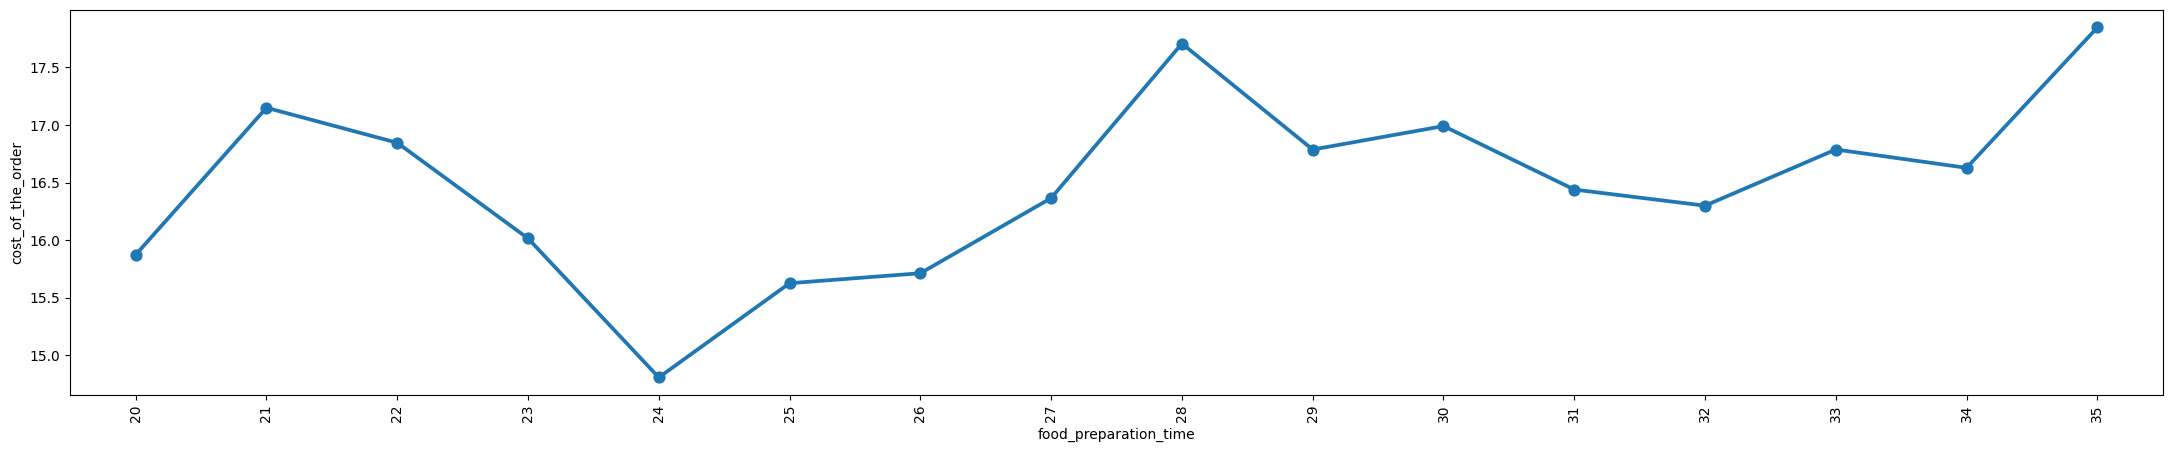

In [ ]:
plt.figure(figsize=(27, 5))
sns.pointplot(x='food_preparation_time', y='cost_of_the_order', data=df, errorbar=None)
plt.xticks(rotation=90);
plt.show()

*  We can conclude that the cost of the order is not significantly affected by the food preparation time.

###Let's check food preparation time by day of the week.

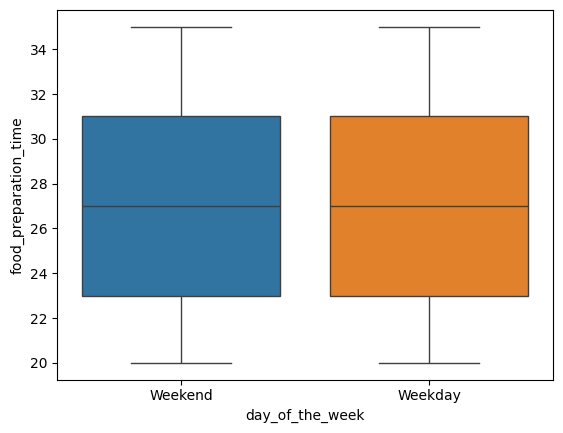

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time', hue='day_of_the_week');
plt.show()

###Let's check delivery time by day of the week.

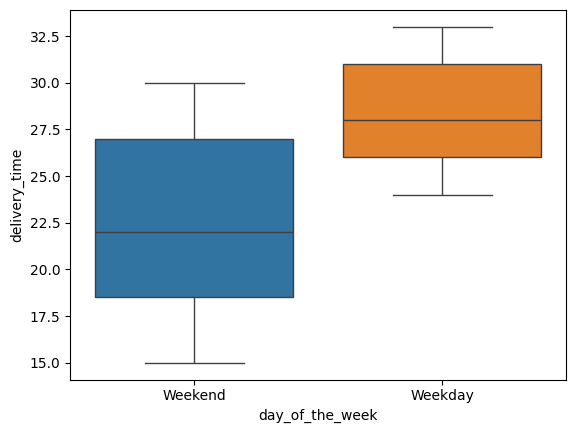

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time', hue='day_of_the_week');
plt.show()

###Observations:

- Delivery time is longer during the week days then the weekend.

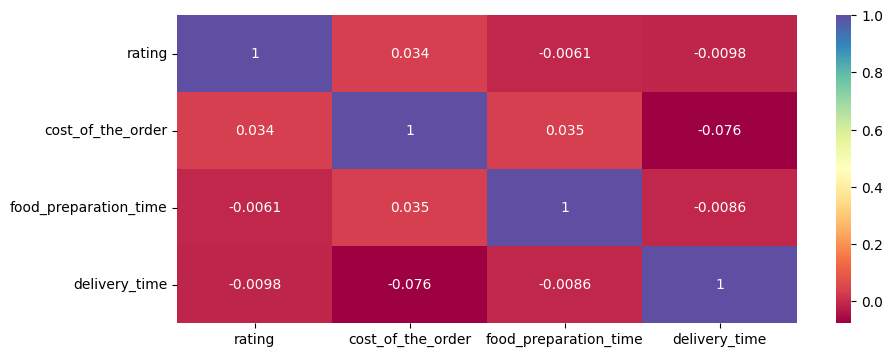

In [ ]:
#Printing the heat map including the rating as a numerical variable to check on correlation.
plt.figure(figsize=(10,4))
sns.heatmap(data=df_not_giving_out[['rating','cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr() ,annot=True,cmap='Spectral');
plt.show()

##Observations:
- We can not observe a significant positive correlation between the variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
rating_count = df_not_giving_out.groupby(['restaurant_name'])['rating'].count().reset_index()
rating_more_than_50 = rating_count[rating_count['rating']>50]
rating_more_than_50

,restaurant_name,rating
16,Blue Ribbon Fried Chicken,64
17,Blue Ribbon Sushi,73
117,Shake Shack,133
132,The Meatball Shop,84


In [ ]:
rating_mean = df_not_giving_out.groupby(['restaurant_name'])['rating'].mean().reset_index()
mean_more_than_4 = rating_count[rating_count['rating']>4]

df_top_restaurants = rating_more_than_50.merge(mean_more_than_4, on = 'restaurant_name', how = 'inner')
df_top_restaurants.restaurant_name

0    Blue Ribbon Fried Chicken
1            Blue Ribbon Sushi
2                  Shake Shack
3            The Meatball Shop
Name: restaurant_name, dtype: object

#### Observations:


*   The restaurants that fulfill the criteria with a value count of more than 50 and an average rating of more than 4 are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.
*   Just 1162 orders out of 1898 have been rated by customers which is just the 61.22%.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Funtion to calculate the total revenue for the company.
def total_revenue(x):
  if (x>5) & (x<=20) :
    x = x*.15
    return x
  elif x>20 :
    x = x*.25
    return x
  else:
    return 0

df['revenue'] = df['cost_of_the_order'].apply(total_revenue)
df['revenue'].sum()


6166.303

####Observations

-  The net revenue generated by the company according **to** the dataset is 6166.303 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#Calculating the total time for the order to be delivered.
df['total_prep_time'] = df['food_preparation_time'] + df['delivery_time']

more_than_60 = df[df['total_prep_time']>60].count() * 100/df.count()
more_than_60[0]

10.53740779768177

#### Observations:
- A total of 10.537% of the orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Check the delivery time by day of the week
delivery_time_mean = df.groupby("day_of_the_week")[["delivery_time"]].mean()
delivery_time_mean

,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


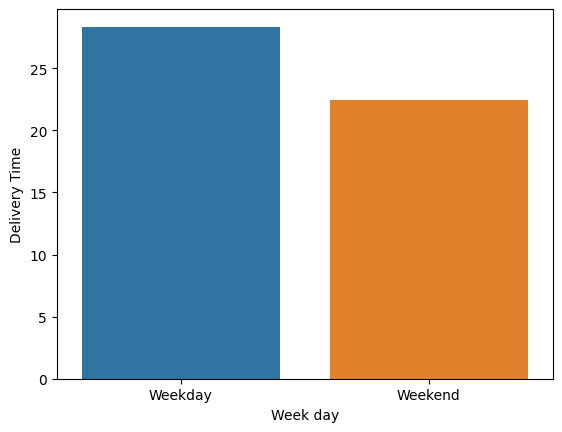

In [ ]:
#Average delivery time by Day of the Week
sns.barplot(data=delivery_time_mean, x='day_of_the_week', y='delivery_time', hue='day_of_the_week');
plt.ylabel('Delivery Time');
plt.xlabel('Week day');

#### Observations:

 - The mean delivery time is longer on weekdays than on weekends, with a difference of 5.87 min.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

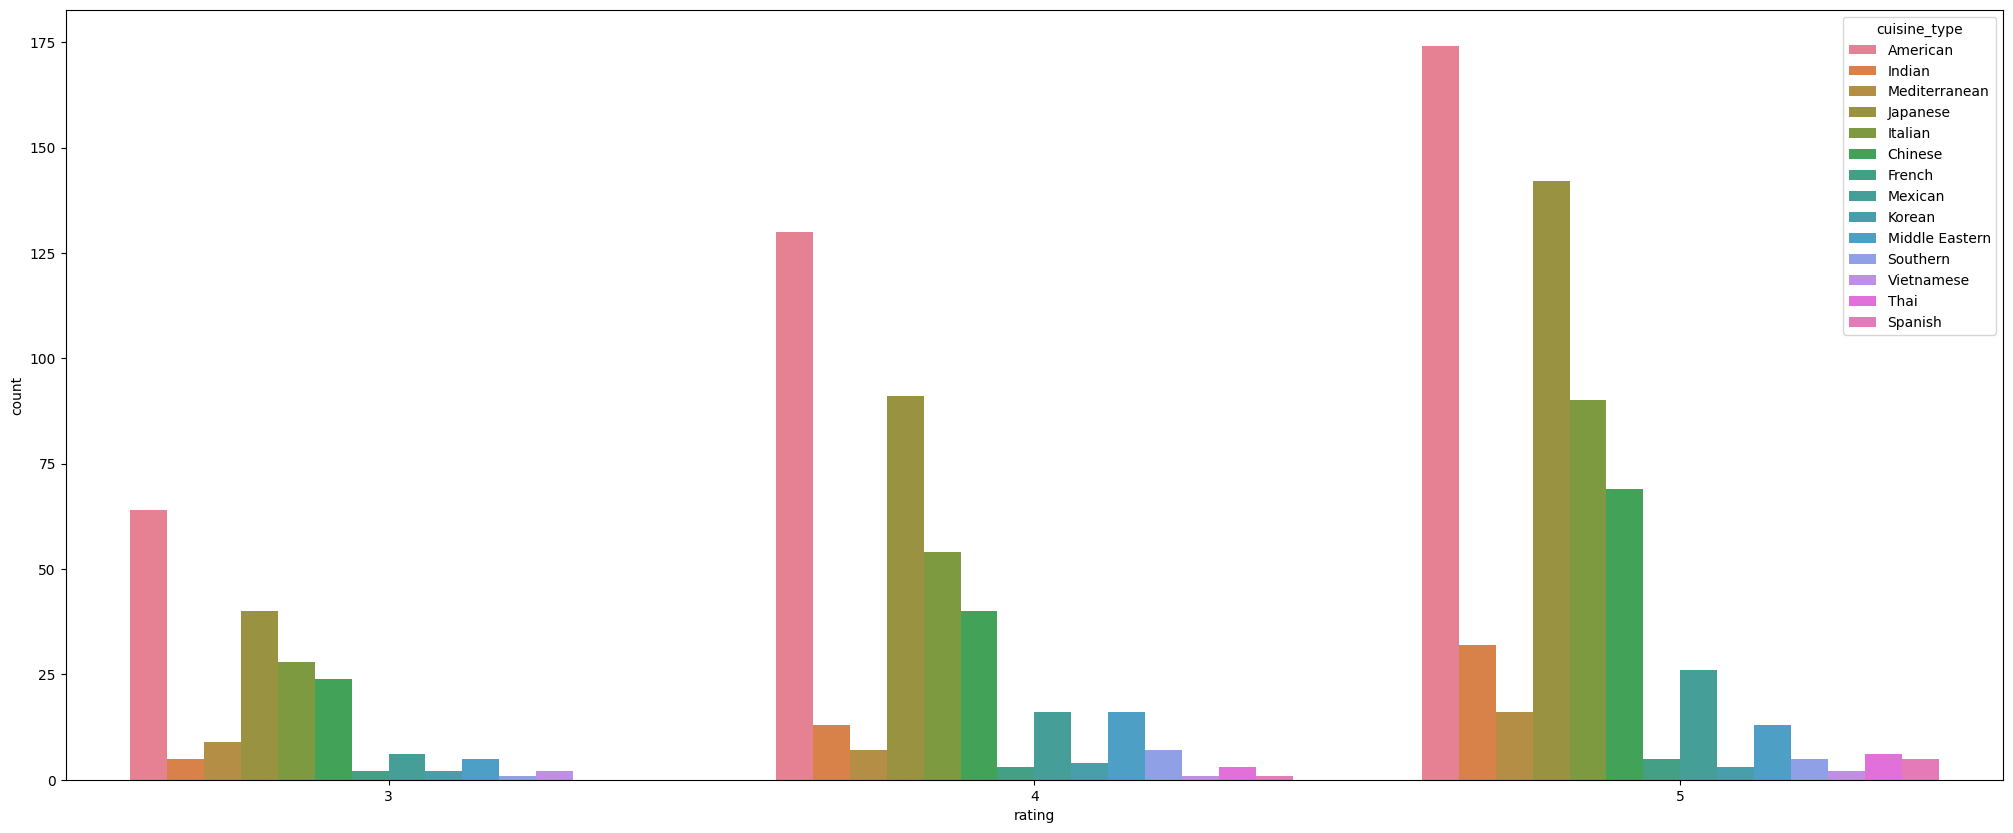

In [ ]:
#Rating and orders count by cuisine type.
plt.figure(figsize=(25,10))
sns.countplot(data=df_not_giving_out, x='rating', hue='cuisine_type');
plt.show()

### Conclusions:
* Out of 1898 orders in our app, 416 customers have placed an order more than one time.
* American cuisine is the most popular type of cuisine during the weekends.
* On weekends, 71.2% of orders are placed compared to 28.8% on weekdays according to data.
* Just 1162 orders out of 1898 have been rated by customers which is just the 61.22%.
* The most common rating per order are 3, 4, and 5.
* The most popular types of cuisine among customers are American, followed by Japanese cuisine and Italian.
* Food preparation time: The minimum preparation time is 20.00 min and a maximum of 35.00 min, with an average of 27.37 min.
* On average, orders cost 16.50, with a median cost of 14.14.
* The delivery time has a median of 24.16 minutes and a maximum of 33 minutes.








### Recommendations:

* Increase the number of cookers on weekends for popular restaurants to improve delivery time and customer satisfaction.
* It would be helpful to collect more data on customer ratings to better predict their satisfaction levels and provide more relevant information to enhance their experience. Due to some restaurants having no reviews could be great to give some promotions to clients who leave a review after completing an order.
* Reducing the delivery time by aggregating new drivers around the restaurants with more demand over the weekends.
* Increase the number of restaurants offering our customers' favorite cuisines, giving them more options, leading to greater customer retention. According to our data, there are not many recurring customers.
* The analysis would've been better if the data set included a complete date/time variable for orders. We could then identify the busiest periods for top restaurants and recommend increasing line cooks during those times to reduce order preparation time and improve customer experience.
* More information about the driver can be helpful so we can assign some restaurants with very high demand to the fastest drivers reducing by that the delivery time.
* Having information about whether a day is a holiday or not could help us understand our client's and customer's behavior better.

---